In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet
from sklearn.metrics import mean_squared_error,r2_score
import math
import time
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('./DataSet/train27303.csv')

In [3]:
df.head()

,timestamp,hourly_traffic_count
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,16
2,2015-10-04 00:10:00,9
3,2015-10-04 00:15:00,12
4,2015-10-04 00:20:00,19


In [4]:
df.tail()

,timestamp,hourly_traffic_count
26491,2016-01-03 23:35:00,16
26492,2016-01-03 23:40:00,15
26493,2016-01-03 23:45:00,10
26494,2016-01-03 23:50:00,19
26495,2016-01-03 23:55:00,15


In [5]:
df.shape

(26496, 2)

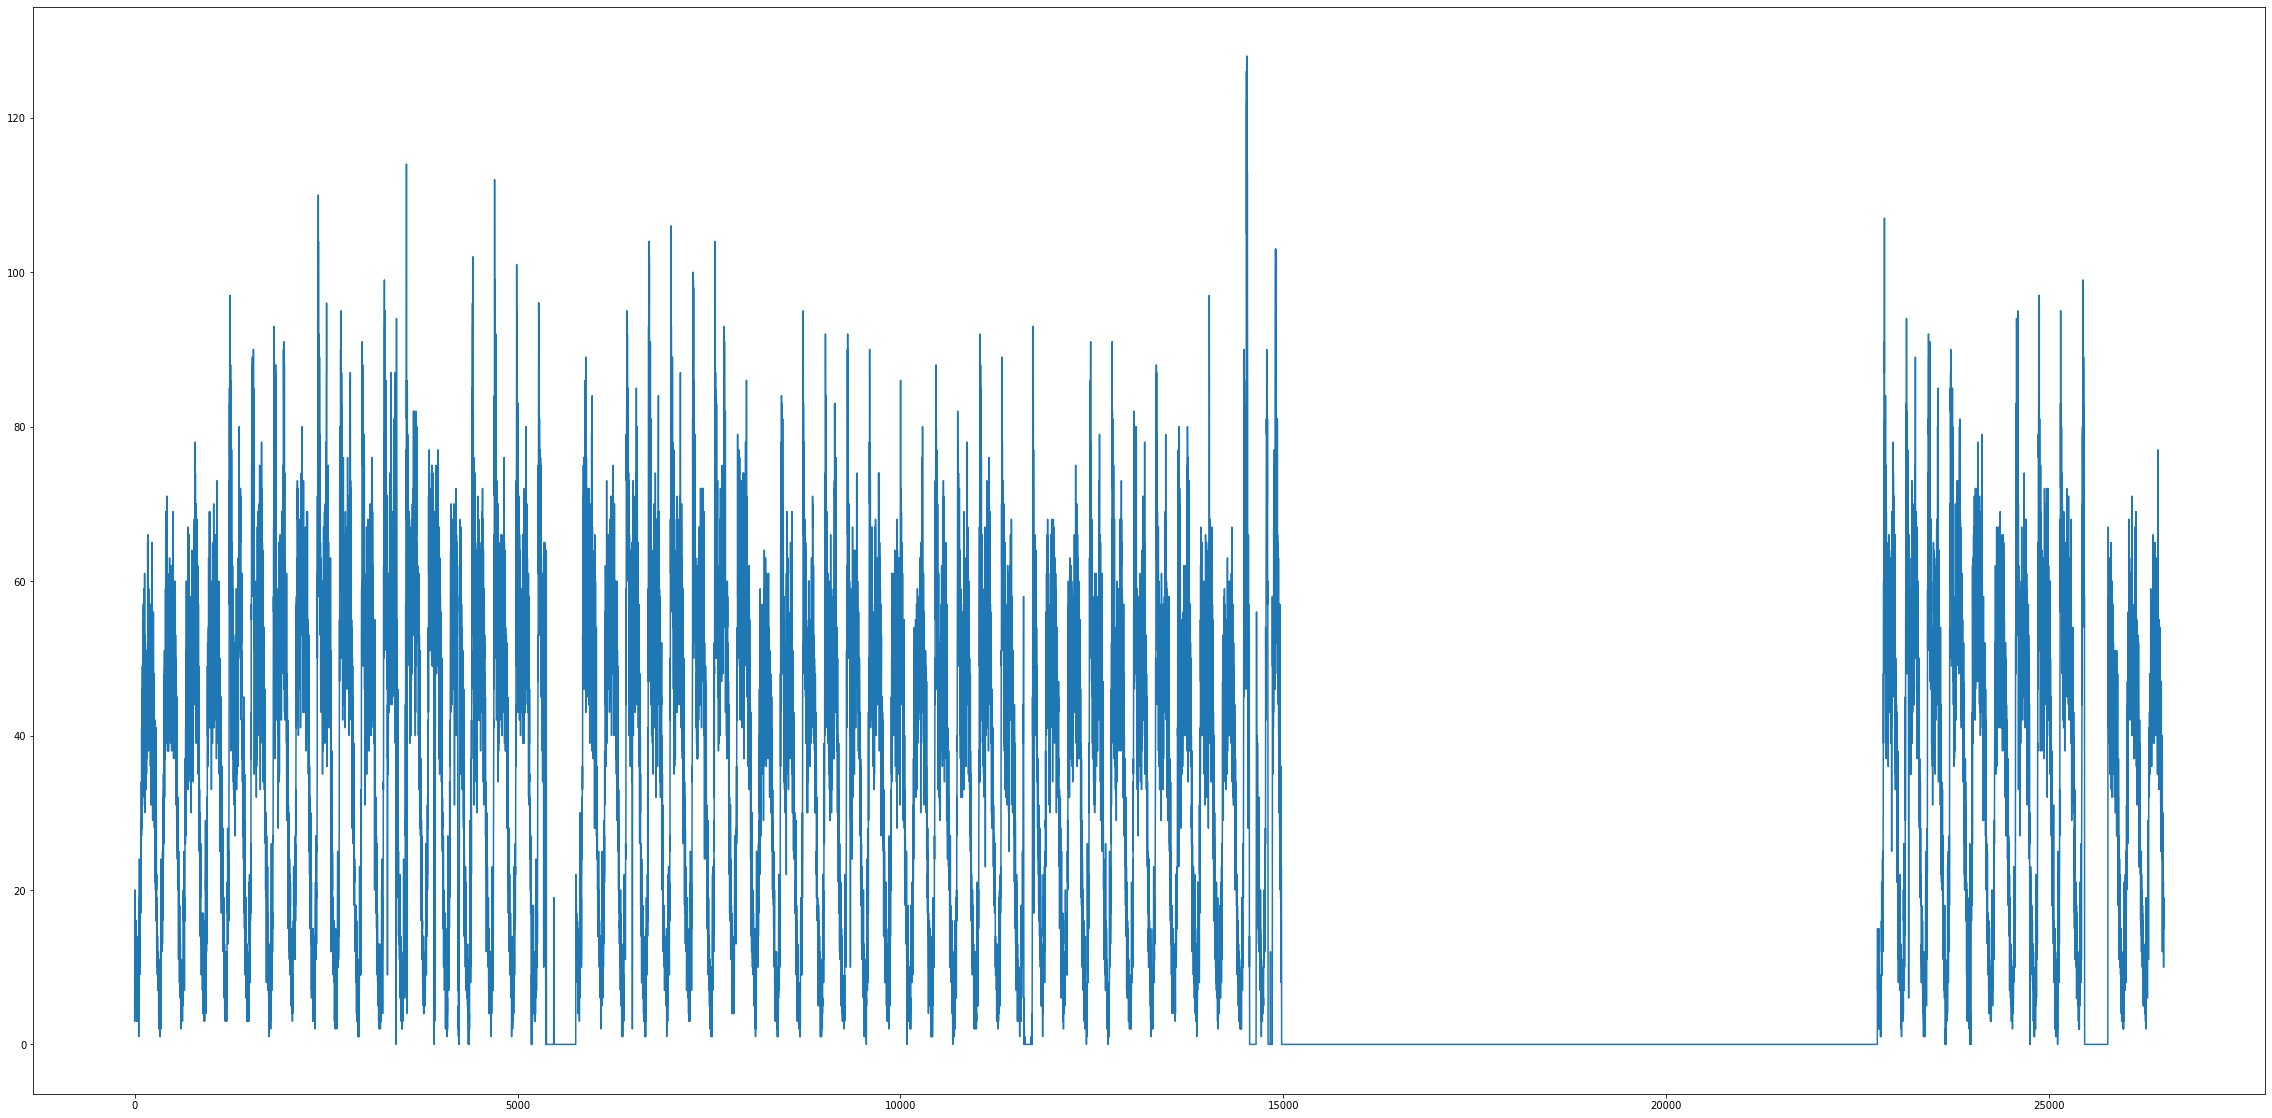

In [6]:
plt.figure(figsize=(40,20))
plt.plot(df['hourly_traffic_count'])
plt.show()

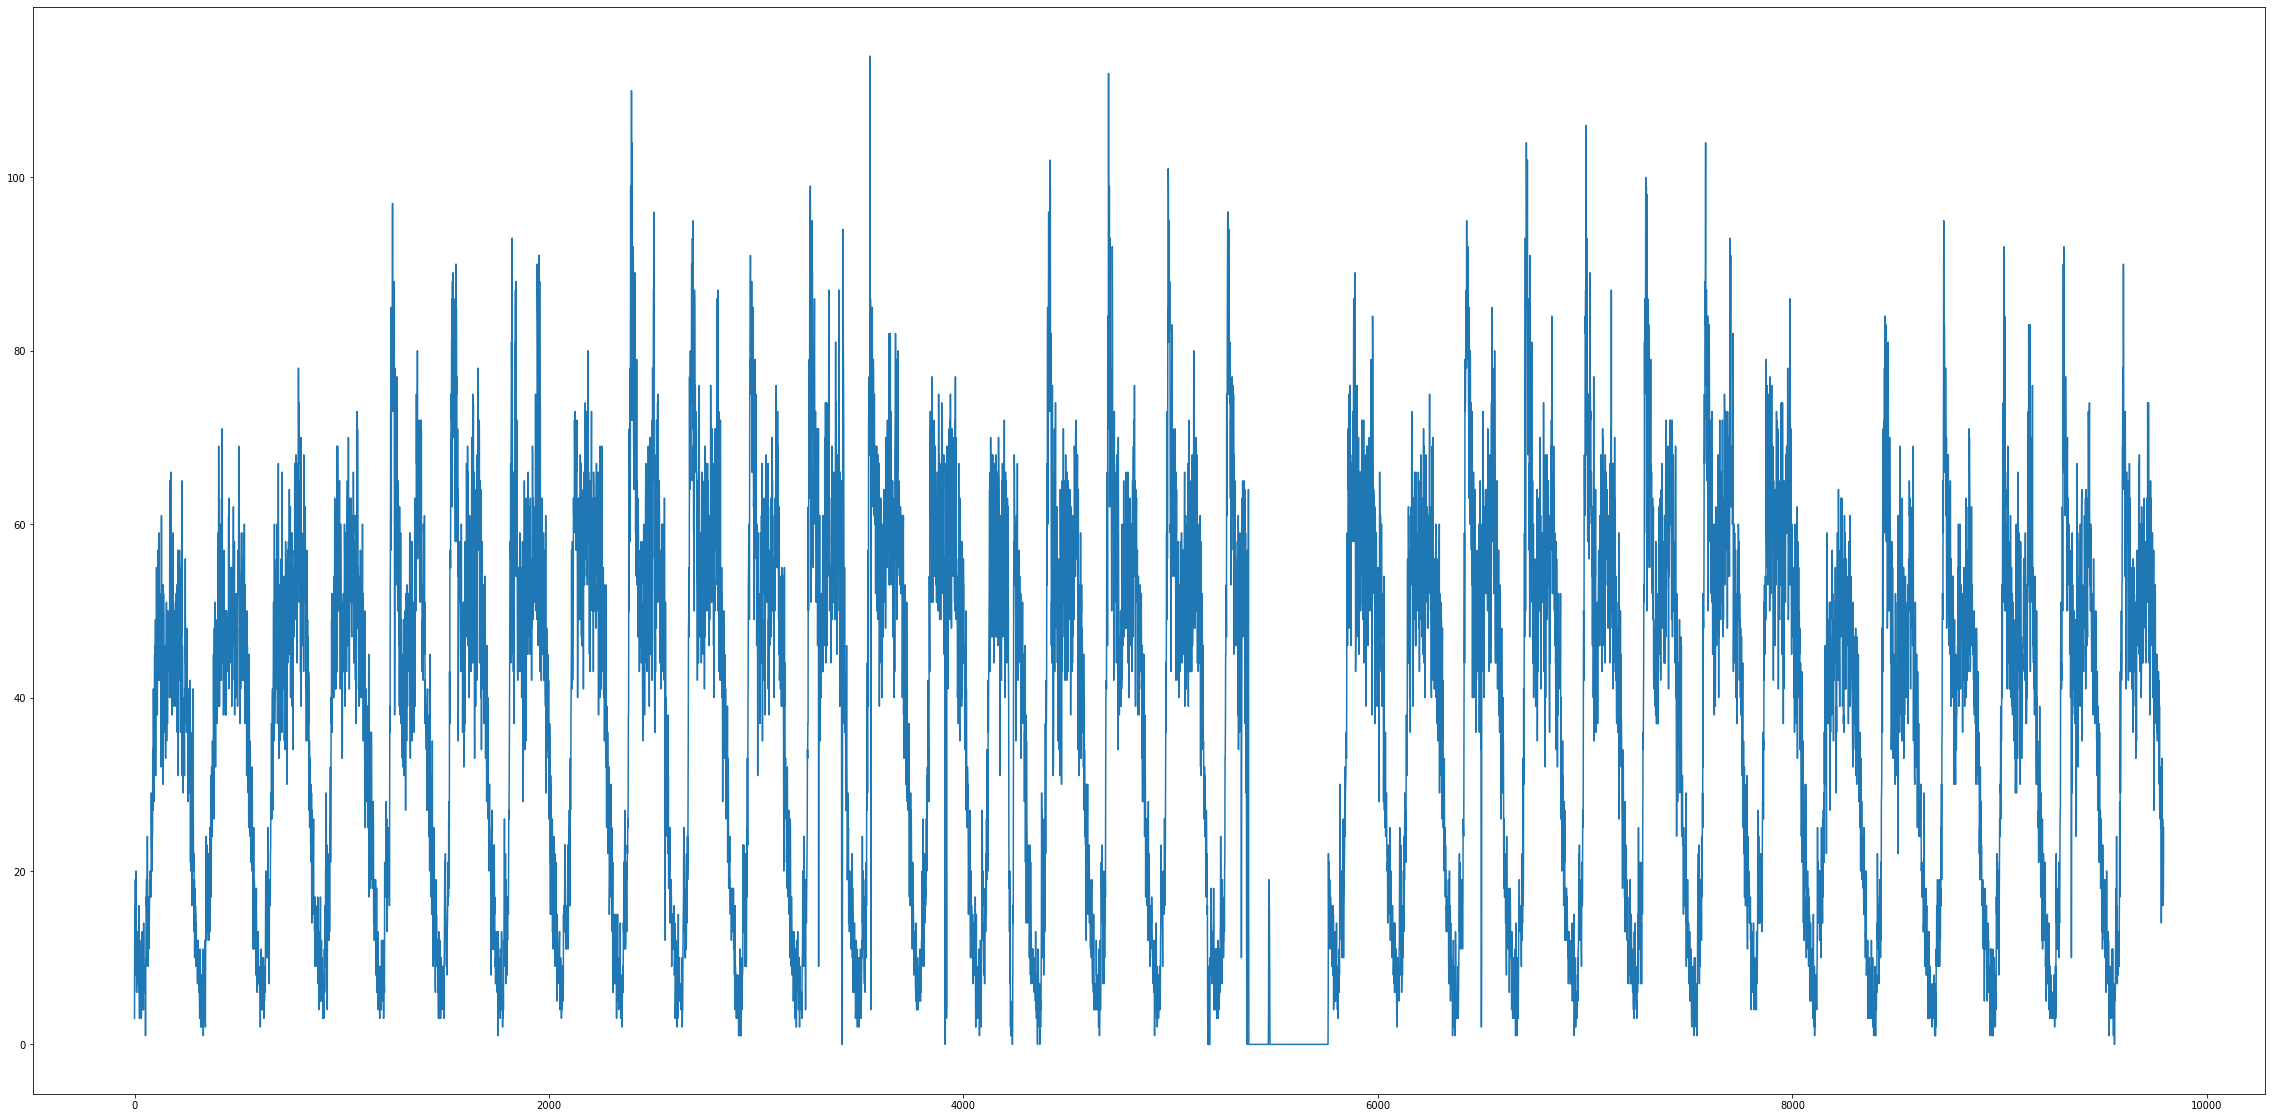

In [7]:
df = df.iloc[:9792,:]

plt.figure(figsize=(40,20))
plt.plot(df['hourly_traffic_count'])
plt.show()

In [8]:
df = df.rename(columns = {'timestamp':'ds','hourly_traffic_count':'y'})
df.dtypes

,ds,y
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,16
2,2015-10-04 00:10:00,9
3,2015-10-04 00:15:00,12
4,2015-10-04 00:20:00,19
...,...,...
9787,2015-11-06 23:35:00,23
9788,2015-11-06 23:40:00,25
9789,2015-11-06 23:45:00,16
9790,2015-11-06 23:50:00,18


In [10]:
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes
df

,ds,y
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,16
2,2015-10-04 00:10:00,9
3,2015-10-04 00:15:00,12
4,2015-10-04 00:20:00,19
...,...,...
9787,2015-11-06 23:35:00,23
9788,2015-11-06 23:40:00,25
9789,2015-11-06 23:45:00,16
9790,2015-11-06 23:50:00,18


In [11]:
train_df = df.iloc[:8928,:]
test_df = df.iloc[8928:,:]

,ds,y
8928,2015-11-04 00:00:00,13
8929,2015-11-04 00:05:00,11
8930,2015-11-04 00:10:00,18
8931,2015-11-04 00:15:00,16
8932,2015-11-04 00:20:00,16
...,...,...
9787,2015-11-06 23:35:00,23
9788,2015-11-06 23:40:00,25
9789,2015-11-06 23:45:00,16
9790,2015-11-06 23:50:00,18


In [12]:
train_df

,ds,y
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,16
2,2015-10-04 00:10:00,9
3,2015-10-04 00:15:00,12
4,2015-10-04 00:20:00,19
...,...,...
8923,2015-11-03 23:35:00,17
8924,2015-11-03 23:40:00,12
8925,2015-11-03 23:45:00,13
8926,2015-11-03 23:50:00,5


In [13]:
test_df

,ds,y
8928,2015-11-04 00:00:00,13
8929,2015-11-04 00:05:00,11
8930,2015-11-04 00:10:00,18
8931,2015-11-04 00:15:00,16
8932,2015-11-04 00:20:00,16
...,...,...
9787,2015-11-06 23:35:00,23
9788,2015-11-06 23:40:00,25
9789,2015-11-06 23:45:00,16
9790,2015-11-06 23:50:00,18


In [24]:
start = time.time()

m = Prophet.Prophet(changepoint_prior_scale=0.01, yearly_seasonality=True)
# m = Prophet.Prophet(yearly_seasonality=True)

m.fit(train_df)

end = time.time()
print('Time Required :', end-start,'seconds')

/Users/johnson/Desktop/kaggle_traffic_analyze/venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -511.987
Time Required : 1.5842249393463135 seconds
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       15070.9    0.00805795       876.441           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       15125.5   0.000669744       1323.91   7.093e-07       0.001      258  LS failed, Hessian reset 
     199         15128    0.00151138       639.215      0.7617      0.7617      268   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         15157     0.0014033       623.076      0.9197      0.9197      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       15167.3   5.41957e-06       413.518      0.4445           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

In [25]:
test = test_df.iloc[:,0:1]
fcst = m.predict(test)

/Users/johnson/Desktop/kaggle_traffic_analyze/venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/johnson/Desktop/kaggle_traffic_analyze/venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [26]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-04 00:00:00,12.364434,-6.202716,25.338303,12.364434,12.364434,-3.204011,-3.204011,-3.204011,-22.023159,...,1.243127,1.243127,1.243127,17.576021,17.576021,17.576021,0.0,0.0,0.0,9.160423
1,2015-11-04 00:05:00,12.375247,-7.213084,24.282496,12.375247,12.375247,-3.522041,-3.522041,-3.522041,-22.315896,...,1.245424,1.245424,1.245424,17.548431,17.548431,17.548431,0.0,0.0,0.0,8.853205
2,2015-11-04 00:10:00,12.386059,-7.656229,22.688674,12.386059,12.386059,-3.821797,-3.821797,-3.821797,-22.590469,...,1.247845,1.247845,1.247845,17.520827,17.520827,17.520827,0.0,0.0,0.0,8.564263
3,2015-11-04 00:15:00,12.396872,-6.864857,24.689036,12.396872,12.396872,-4.105148,-4.105148,-4.105148,-22.848749,...,1.250391,1.250391,1.250391,17.493210,17.493210,17.493210,0.0,0.0,0.0,8.291724
4,2015-11-04 00:20:00,12.407684,-7.335651,24.089771,12.407684,12.407684,-4.374042,-4.374042,-4.374042,-23.092682,...,1.253061,1.253061,1.253061,17.465579,17.465579,17.465579,0.0,0.0,0.0,8.033643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2015-11-06 23:35:00,21.652339,-27.130628,4.613067,20.762217,22.598553,-33.599663,-33.599663,-33.599663,-20.229122,...,-2.354631,-2.354631,-2.354631,-11.015910,-11.015910,-11.015910,0.0,0.0,0.0,-11.947325
860,2015-11-06 23:40:00,21.663151,-27.669254,4.926732,20.771762,22.610746,-34.005924,-34.005924,-34.005924,-20.636833,...,-2.314335,-2.314335,-2.314335,-11.054756,-11.054756,-11.054756,0.0,0.0,0.0,-12.342773
861,2015-11-06 23:45:00,21.673963,-28.292274,2.157751,20.781699,22.622940,-34.386445,-34.386445,-34.386445,-21.018782,...,-2.274048,-2.274048,-2.274048,-11.093615,-11.093615,-11.093615,0.0,0.0,0.0,-12.712482
862,2015-11-06 23:50:00,21.684776,-30.568771,2.306366,20.791994,22.634902,-34.742460,-34.742460,-34.742460,-21.376202,...,-2.233773,-2.233773,-2.233773,-11.132486,-11.132486,-11.132486,0.0,0.0,0.0,-13.057684


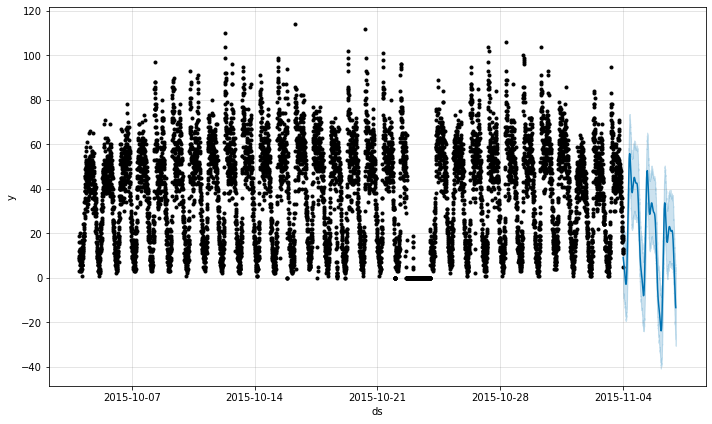

In [27]:
fig = m.plot(fcst)

/Users/johnson/Desktop/kaggle_traffic_analyze/venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/johnson/Desktop/kaggle_traffic_analyze/venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/johnson/Desktop/kaggle_traffic_analyze/venv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


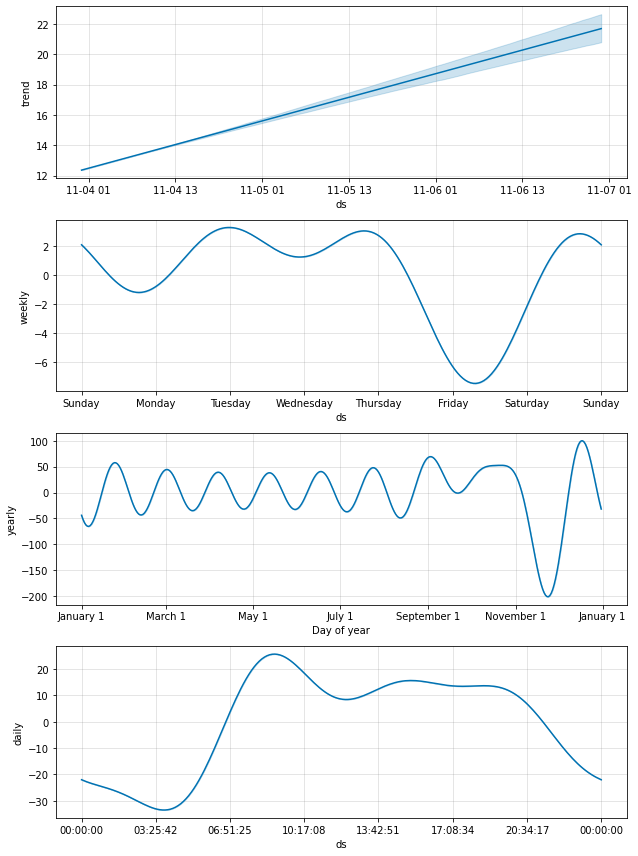

In [28]:
fig2 = m.plot_components(fcst)

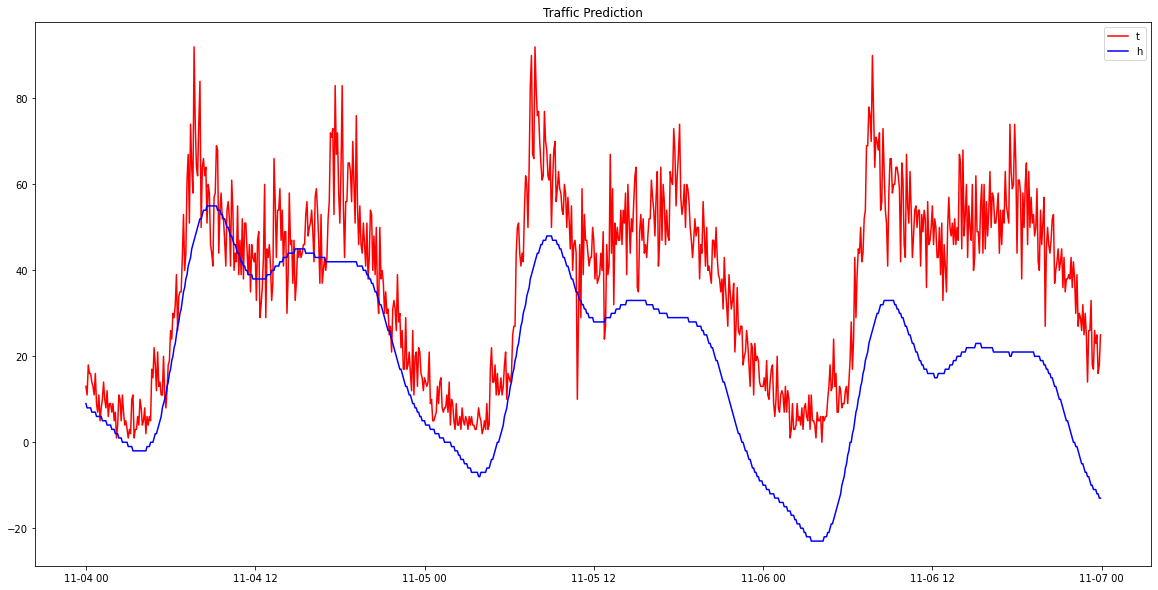

In [29]:
plt.figure(figsize=(20,10))
plt.plot(test_df['ds'],test_df['y'], color = 'red', label = 'Real Traffic Count')
plt.plot(fcst['ds'],fcst['yhat'].astype(int), color = 'blue', label = 'Predicted Traffic Count')
plt.title('Traffic Prediction')
plt.legend('this is legend')
plt.show()

In [31]:
groundtruth = test_df.copy()
groundtruth


,ds,y
8928,2015-11-04 00:00:00,13
8929,2015-11-04 00:05:00,11
8930,2015-11-04 00:10:00,18
8931,2015-11-04 00:15:00,16
8932,2015-11-04 00:20:00,16
...,...,...
9787,2015-11-06 23:35:00,23
9788,2015-11-06 23:40:00,25
9789,2015-11-06 23:45:00,16
9790,2015-11-06 23:50:00,18


In [38]:
groundtruth['y_predicted'] = fcst['yhat'].values.astype(int)
groundtruth
output = groundtruth

In [39]:
output.to_csv('./output_with_index.csv',index=True)
output.to_csv('./output_without_index.csv',index=False)


In [40]:
# calcu for RMSE, R Squared Score, Tiem required for calcu

rmse = math.sqrt(mean_squared_error(test_df['y'],fcst['yhat'].astype(int)))
print("Root Mean Squared Error :",rmse)
r_sq = r2_score(test_df['y'],fcst['yhat'].astype(int))
print("R Squared Score :",r_sq)
print('Time Required :', end-start,'seconds')

Root Mean Squared Error : 22.53926614862424
R Squared Score : -0.15891088573518464
Time Required : 1.5842249393463135 seconds
